In [7]:
import sys
import cv2
import os
import random

import imageutils as imageutils
%matplotlib inline

assert (sys.version_info[0]>=3 and sys.version_info[1]>=6), "Wrong Python Version. Please use >3.6"

#### Set Image-Folders and Format

In [14]:
ORIGINAL_IMAGES_DIRS = ["./data/raw_kunde/onlystreets"]
VALID_FORMATS = [".jpg",".png"]

#### Load Images into »raw_images«

In [15]:
raw_images = []
for d in ORIGINAL_IMAGES_DIRS:
    raw_images += imageutils.getImageListFromDir(d, VALID_FORMATS)

print("loaded {} images".format(str(len(raw_images))))

loaded 9 images


#### (testing) Slice Image

In [13]:
croppedImage = imageutils.createImageSlices(raw_images[0], tile_size=(112,112), offset=(112,112))

#### (testing)Test-Plot a sliced Image

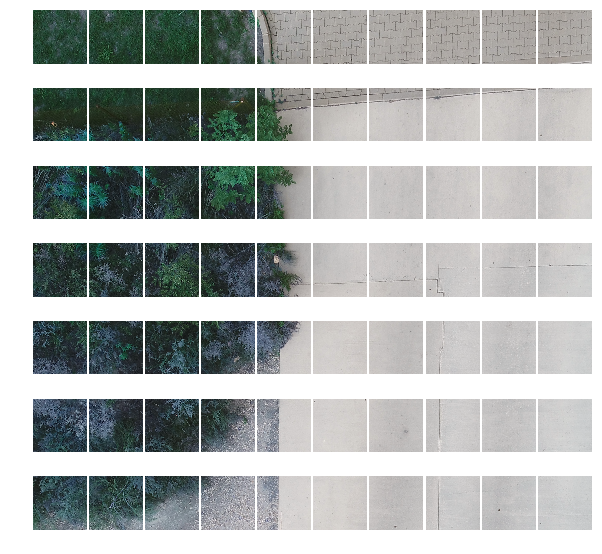

In [8]:
imageutils.plotImageTiles(croppedImage)

#### slice all Images

In [16]:
sliced_images = []
for image in raw_images:
    slicedImg = imageutils.createImageSlices(image, tile_size=(112,112), offset=(112,112))
    sliced_images.append(slicedImg)

In [17]:
len(sliced_images)

9

#### Save all slices to directory

In [18]:
TARGET_DIR = "./data/slices/input"

In [19]:
for i, img in enumerate(sliced_images):
    for j, sliceTile in enumerate(img):
        cv2.imwrite(os.path.join(TARGET_DIR, 'slice_'+str(i)+'_'+str(j)+'.jpg'), sliceTile)

#### CREATE IMAGE GROUND TRUTH

Now comes the fun part. Sort the resulting slices to "has crack" and "negative"... 
<br/>..... 
<br/>.....
<br/>....
<br/>..
<br/>.
<br/>takes some time ;)

#### Train / Test split
Randomly takes a percentage of the images and stores them in test-set directory

In [21]:
TRAIN_CRACKS_IMAGES_DIR = "./data/slices/train/cracks"
TRAIN_BUILDINGS_IMAGES_DIR = "./data/slices/train/buildings"
TRAIN_CONCRETE_IMAGES_DIR = "./data/slices/train/concrete"
TRAIN_FLORA_IMAGES_DIR = "./data/slices/train/flora"
TRAIN_SAND_IMAGES_DIR = "./data/slices/train/sand"

VALIDATE_CRACKS_IMAGES_DIR = "./data/slices/validation/cracks"
VALIDATE_BUILDINGS_IMAGES_DIR = "./data/slices/validation/buildings"
VALIDATE_CONCRETE_IMAGES_DIR = "./data/slices/validation/concrete"
VALIDATE_FLORA_IMAGES_DIR = "./data/slices/validation/flora"
VALIDATE_SAND_IMAGES_DIR = "./data/slices/validation/sand"


def saveValidationPercentage(source, target, validationPercentage = 0.2):
    for f in os.listdir(source):
        if random.uniform(0, 1) < validationPercentage:
            os.rename(os.path.join(source, f), os.path.join(target,f))



saveValidationPercentage(TRAIN_CRACKS_IMAGES_DIR, VALIDATE_CRACKS_IMAGES_DIR)
saveValidationPercentage(TRAIN_BUILDINGS_IMAGES_DIR, VALIDATE_BUILDINGS_IMAGES_DIR)
saveValidationPercentage(TRAIN_CONCRETE_IMAGES_DIR, VALIDATE_CONCRETE_IMAGES_DIR)
saveValidationPercentage(TRAIN_FLORA_IMAGES_DIR, VALIDATE_FLORA_IMAGES_DIR)
saveValidationPercentage(TRAIN_SAND_IMAGES_DIR, VALIDATE_SAND_IMAGES_DIR)
